# Data Import and Preview

In [1]:
import pandas as pd
df=pd.read_csv('data.csv', sep=',')
print(df.shape)

(1027848, 170)


First 5 rows preview of data

In [2]:
df.head()

,Cell_ID,Animal_ID,Animal_sex,Behavior,Bregma,Centroid_X,Centroid_Y,Cell_class,Neuron_cluster_ID,Ace2,...,Penk,Scg2,Sln,Sst,Tac1,Tac2,Th,Trh,Ucn3,Vgf
0,6749ccb4-2ed1-4029-968f-820a287f43c8,1,Female,Naive,0.26,-3211.562145,2608.541476,Astrocyte,NaN,0.0,...,0.133016,0.000000,0.865263,0.002977,0.054826,0.008934,0.0,0.0,0.0,0.000000
1,6cac74bd-4ea7-4701-8701-42563cc65eb8,1,Female,Naive,0.26,-3207.923151,2621.795437,Inhibitory,I-5,0.0,...,0.000000,0.000000,0.277939,0.868702,0.580957,0.010079,0.0,0.0,0.0,0.000000
2,9f29bd57-16a5-4b26-b9f5-37598809da9e,1,Female,Naive,0.26,-3209.578004,2633.153494,Inhibitory,I-6,0.0,...,0.213939,0.000000,0.377907,0.049332,0.084898,0.008951,0.0,0.0,0.0,0.000000
3,d7eb4e0b-276e-47e3-a55c-0b033180a2fe,1,Female,Naive,0.26,-3203.853515,2756.045983,Inhibitory,I-5,0.0,...,0.050882,0.089038,0.000000,0.000000,0.001530,0.031364,0.0,0.0,0.0,0.001138
4,54434f3a-eba9-4aec-af35-c9d317ffa1d5,1,Female,Naive,0.26,-3202.682705,2608.803635,Inhibitory,I-9,0.0,...,1.250661,0.159618,0.211159,0.000000,0.087730,0.000000,0.0,0.0,0.0,0.029419


# Data Processing

Bad values processing

In [3]:
train_size = 27848 #subject to change, I set it to 27848 to run the classifer faster for demo purpose only
train_data = df[0:train_size]
train_data = train_data.fillna(0)

Create a train set

In [4]:
y = train_data["Cell_class"]
X = train_data.drop(['Cell_ID','Animal_ID', 'Animal_sex', 'Behavior','Bregma','Centroid_X','Centroid_Y','Cell_class','Neuron_cluster_ID'], axis = 1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Decision tree classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [7]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.778096947935368


# Feature Importance with One-vs-all Decision Tree

In [8]:
#export the list of cell class
cell_class = train_data.Cell_class.unique()
print(cell_class[0])

Astrocyte


In [10]:
#in this part we will perform OVA Decision Tree to see the most important feature or marker genes
cell_class_id = 0 # change this value to choose other cell type

train_data.loc[(df['Cell_class'] == cell_class[0]), 'Cell_class'] = "positive"
train_data.loc[(df['Cell_class'] != cell_class[0]), 'Cell_class'] = "negative"

train_data.head()

,Cell_ID,Animal_ID,Animal_sex,Behavior,Bregma,Centroid_X,Centroid_Y,Cell_class,Neuron_cluster_ID,Ace2,...,Penk,Scg2,Sln,Sst,Tac1,Tac2,Th,Trh,Ucn3,Vgf
0,6749ccb4-2ed1-4029-968f-820a287f43c8,1,Female,Naive,0.26,-3211.562145,2608.541476,positive,0,0.0,...,0.133016,0.000000,0.865263,0.002977,0.054826,0.008934,0.0,0.0,0.0,0.000000
1,6cac74bd-4ea7-4701-8701-42563cc65eb8,1,Female,Naive,0.26,-3207.923151,2621.795437,negative,I-5,0.0,...,0.000000,0.000000,0.277939,0.868702,0.580957,0.010079,0.0,0.0,0.0,0.000000
2,9f29bd57-16a5-4b26-b9f5-37598809da9e,1,Female,Naive,0.26,-3209.578004,2633.153494,negative,I-6,0.0,...,0.213939,0.000000,0.377907,0.049332,0.084898,0.008951,0.0,0.0,0.0,0.000000
3,d7eb4e0b-276e-47e3-a55c-0b033180a2fe,1,Female,Naive,0.26,-3203.853515,2756.045983,negative,I-5,0.0,...,0.050882,0.089038,0.000000,0.000000,0.001530,0.031364,0.0,0.0,0.0,0.001138
4,54434f3a-eba9-4aec-af35-c9d317ffa1d5,1,Female,Naive,0.26,-3202.682705,2608.803635,negative,I-9,0.0,...,1.250661,0.159618,0.211159,0.000000,0.087730,0.000000,0.0,0.0,0.0,0.029419


In [11]:
y = train_data["Cell_class"]
X = train_data.drop(['Cell_ID','Animal_ID', 'Animal_sex', 'Behavior','Bregma','Centroid_X','Centroid_Y','Cell_class','Neuron_cluster_ID'], axis = 1)

Automatically created module for IPython interactive environment


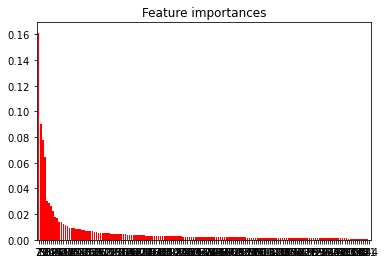

Feature ranking:
1. genes importance Ace2 (0.161224)
2. genes importance Adora2a (0.090030)
3. genes importance Aldh1l1 (0.077994)
4. genes importance Amigo2 (0.064177)
5. genes importance Ano3 (0.029898)
6. genes importance Aqp4 (0.028946)
7. genes importance Ar (0.026033)
8. genes importance Arhgap36 (0.022048)
9. genes importance Avpr1a (0.017787)
10. genes importance Avpr2 (0.016851)
11. genes importance Baiap2 (0.013816)
12. genes importance Bdnf (0.013474)
13. genes importance Blank_1 (0.012641)
14. genes importance Blank_2 (0.011743)
15. genes importance Blank_3 (0.011048)
16. genes importance Blank_4 (0.009286)
17. genes importance Blank_5 (0.009280)
18. genes importance Bmp7 (0.009175)
19. genes importance Brs3 (0.008773)
20. genes importance Calcr (0.008301)
21. genes importance Cbln1 (0.008287)
22. genes importance Cbln2 (0.007469)
23. genes importance Cckar (0.007380)
24. genes importance Cckbr (0.007030)
25. genes importance Ccnd2 (0.006959)
26. genes importance Cd24a (0.0

In [14]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Print the feature ranking
print("Feature ranking:")

genes_list = list(X)
for f in range(X.shape[1]):
    print("%d. genes importance %s (%f)" % (f + 1, genes_list[f], importances[indices[f]]))
